In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,ave_salary,company name,same_state,headquater,age,python_yn,r studio,spark,aws,excel
0,Data Scientist,CA$89K-CA$100K (Glassdoor Est.),"What We Are Building:\n\nAt Rubikloud, we are ...",3.7,Rubikloud Technologies\n3.7,Toronto,"Toronto, Canada",51 to 200 employees,2013,Company - Private,...,94.5,Rubikloud Technologies\n,1,Toronto,7,1,1,1,0,0
1,Data Scientist,CA$89K-CA$100K (Glassdoor Est.),"Company Profile\n\nHome Capital Group Inc., to...",3.1,Home Trust\n3.1,Toronto,"Toronto, Canada",501 to 1000 employees,1977,Company - Public,...,94.5,Home Trust\n,1,Toronto,43,1,1,1,0,1
2,Data Scientist,CA$89K-CA$100K (Glassdoor Est.),The Analytic & Insights Group at The AIR MILES...,-1.0,AIR MILES,Toronto,"Toronto, Canada",501 to 1000 employees,1992,Company - Private,...,94.5,AIR MILES,1,Toronto,28,1,1,1,0,0
3,Data Scientist,CA$89K-CA$100K (Glassdoor Est.),YOU’LL LEVERAGE DATA TO IMPACT GLOBAL BUSINESS...,3.6,Nielsen\n3.6,Toronto,"New York, NY",10000+ employees,1923,Company - Public,...,94.5,Nielsen\n,0,New York,97,1,1,0,0,1
4,Data Scientist,CA$89K-CA$100K (Glassdoor Est.),Wanted: An eagle-eyed Data Scientist who will ...,5.0,Precision Nutrition\n5.0,Toronto,"Toronto, Canada",51 to 200 employees,2001,Company - Private,...,94.5,Precision Nutrition\n,1,Toronto,19,1,1,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'ave_salary', 'company name', 'same_state',
       'headquater', 'age', 'python_yn', 'r studio', 'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machnie learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
    
# job title and seniority

# hourly wage to annual
# remove new line from job title

     

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df['job_simp'].value_counts()

data scientist    150
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df['seniority'].value_counts()

senior    110
na         40
Name: seniority, dtype: int64

In [10]:
df['Location'].value_counts()

Toronto          76
Brampton         56
Woodbridge        9
Mississauga       4
Newmarket         1
Oakville          1
Stouffville       1
Richmond Hill     1
Markham           1
Name: Location, dtype: int64

In [11]:
# job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3707
1      3274
2      4443
3      4466
4      8398
       ... 
145    5527
146    2801
147    6346
148    2813
149    6344
Name: desc_len, Length: 150, dtype: int64

In [28]:
# company format fix
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
df['Company Name']

0         Rubikloud Technologies
1                     Home Trust
2                      AIR MILES
3                        Nielsen
4            Precision Nutrition
                 ...            
145    Canadian Tire Corporation
146                GALE Partners
147                    Joe Fresh
148                      407 ETR
149     Loblaw Companies Limited
Name: Company Name, Length: 150, dtype: object

In [13]:
# competior count
df['num_comp'] = df['Competitors'].apply(lambda x: 0 if x == '-1' else x)
df['num_comp']

0                              0
1                              0
2                              0
3                              0
4                              0
                 ...            
145    Home Depot Canada, Lowe's
146                            0
147                            0
148                            0
149                            0
Name: num_comp, Length: 150, dtype: object

In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'ave_salary', 'company name', 'same_state',
       'headquater', 'age', 'python_yn', 'r studio', 'spark', 'aws', 'excel',
       'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [15]:
df.describe()

,Rating,Founded,min_salary,max_salary,ave_salary,same_state,age,python_yn,r studio,spark,aws,excel,desc_len
count,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,150.000000,150.000000
mean,3.45400,1331.066667,77.200000,104.200000,90.700000,0.553333,41.893333,0.960000,1.0,0.600000,0.453333,0.426667,4727.573333
std,0.85598,918.443801,6.230473,3.440774,1.945568,0.498813,61.595470,0.196616,0.0,0.491539,0.499485,0.496250,1807.135834
min,-1.00000,-1.000000,73.000000,100.000000,89.000000,0.000000,-1.000000,0.000000,1.0,0.000000,0.000000,0.000000,488.000000
25%,3.30000,-1.000000,73.000000,100.000000,90.000000,0.000000,-1.000000,1.000000,1.0,0.000000,0.000000,0.000000,3455.750000
50%,3.50000,1887.000000,73.000000,107.000000,90.000000,1.000000,14.000000,1.000000,1.0,1.000000,0.000000,0.000000,4096.000000
75%,3.70000,2006.000000,78.000000,107.000000,90.000000,1.000000,85.000000,1.000000,1.0,1.000000,1.000000,1.000000,6344.000000
max,5.00000,2016.000000,89.000000,107.000000,94.500000,1.000000,208.000000,1.000000,1.0,1.000000,1.000000,1.000000,8517.000000


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'ave_salary', 'company name', 'same_state',
       'headquater', 'age', 'python_yn', 'r studio', 'spark', 'aws', 'excel',
       'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

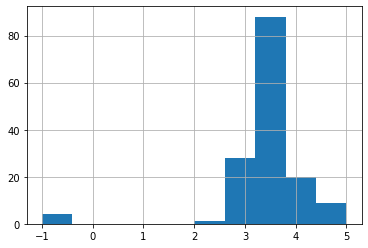

In [17]:
df['Rating'].hist()

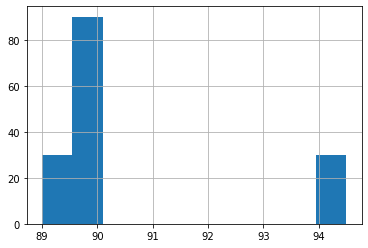

In [18]:
df['ave_salary'].hist()

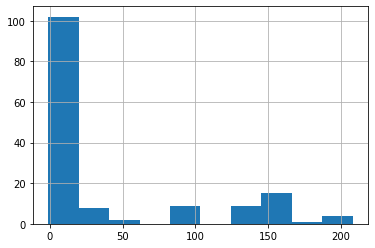

In [19]:
df['age'].hist()

In [20]:
idx = df.index[df['age'] == df['age'].max()].tolist()
idx

[23]

In [29]:
df.loc[23]

Job Title                                               Data Scientist
Salary Estimate                        CA$89K-CA$100K (Glassdoor Est.)
Job Description      This is a Data Scientist role within the Big D...
Rating                                                             3.7
Company Name                                                      Citi
Location                                                   Mississauga
Headquarters                                              New York, NY
Size                                                  10000+ employees
Founded                                                           1812
Type of ownership                                     Company - Public
Industry                         Investment Banking & Asset Management
Sector                                                         Finance
Revenue                                             $10+ billion (CAD)
Competitors                                                         -1
min_sa